# Regression Exercise - (1)
## Requirements
* 完成hypothesis function 和 cost function
* 分別測試 (θ0 θ1) = (0, 0), (1 , 1), (10, -1)，印出算出的cost值
* 觀察不同 θ 值所得到的regression line和cost之間的關係
---

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 讀檔以及畫圖的function

In [2]:
# read input data
def read_data(file_name):
    data = pd.read_csv(file_name)

    return data

# plot input data
def plot_input_data(data):
    data_X = data['X_1'].values
    data_y = data['y'].values
    
    plt.scatter(data_X, data_y, s=60, alpha=.6)
    plt.xlabel("X_1")
    plt.ylabel("y")
    plt.show()

# plot regression line
def plot_regression_line(X, y, theta):
    plt.scatter(X[:,1], y, s=60, alpha=.6)
    plt.plot(X[:,1], theta[0][0] + theta[0][1]*X[:,1], 'r-')
    plt.xlabel("X_1")
    plt.ylabel("y")
    plt.show()   

### *請完成 h( ) 和 compute_cost( )
- 提示
    - numpy.dot
    - numpy.power

In [3]:
# hypothesis function
def h(X, theta):
    return np.dot(X, theta.T)

# cost function
def compute_cost(X, y, theta):
    total = np.power(h(X, theta) - y, 2)
    m = len(X)
    J = np.sum(total)/(2*m)
    
    return J

### 印出 data.csv 內容以及視覺化

      X_1        y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


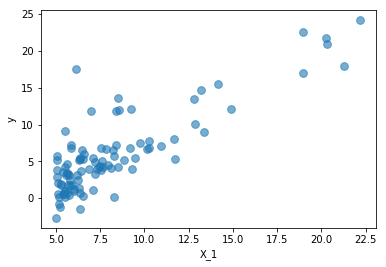

In [4]:
file_name = 'data/regression_exercise1_data.csv'

data = read_data(file_name)

print(data.head()) # show the head of data
plot_input_data(data) # plot the input data

### 補上feature x0 
- 原本`h(x) = θ0 + θ1 * x1`，資料只有x1 這個feature
- 等同於 `h(x) = θ0 * x0 + θ1 * x1`  (為方便計算補上feature x0，且設 x0全為1)

In [5]:
data.insert(0, 'X_0', 1)
print(data.head())

   X_0     X_1        y
0    1  6.1101  17.5920
1    1  5.5277   9.1302
2    1  8.5186  13.6620
3    1  7.0032  11.8540
4    1  5.8598   6.8233


### 切分feature和label
- 取column 'X_0', 'X_1' 當作feature (X)
- 取column 'y' 當作label (y)

In [6]:
X_df = data.iloc[:, 0:2]
y_df = data.iloc[:, 2:3]

print(X_df.head())
print(y_df.head())

   X_0     X_1
0    1  6.1101
1    1  5.5277
2    1  8.5186
3    1  7.0032
4    1  5.8598
         y
0  17.5920
1   9.1302
2  13.6620
3  11.8540
4   6.8233


### *分別測試 (θ0 θ1) = (0, 0), (1 , 1), (10, -1)，印出算出的cost值
- 提示: 呼叫 compute_cost( ) 

### *觀察不同 θ 值所得到的regression line和cost之間的關係
- 提示: 呼叫plot_regerssion_line( )

weight: [[0 0]] cost: 32.072733877455676


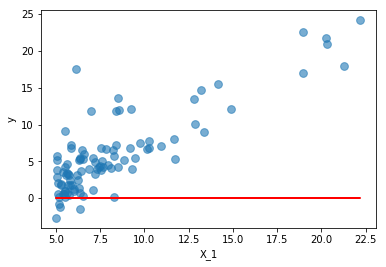

weight: [[1 1]] cost: 10.266520491383504


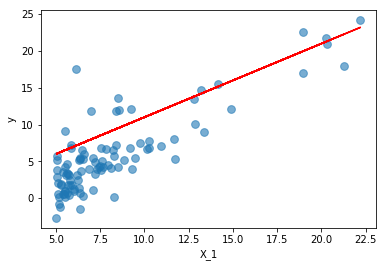

weight: [[10 -1]] cost: 48.11420451857938


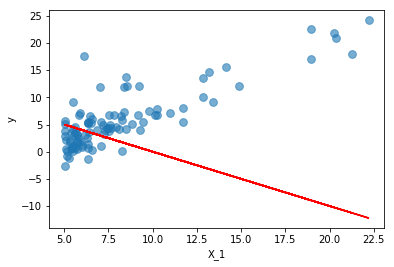

In [7]:
X = X_df.values
y = y_df.values

theta_initial1 = np.array([[0, 0]]) # theta_0, theta_1 = 0
theta_initial2 = np.array([[1, 1]]) # theta_0 = 1 theta_1 = 1
theta_initial3 = np.array([[10, -1]]) # theta_0 = 10, theta_1 = -1


print('weight:', theta_initial1, 'cost:', compute_cost(X, y, theta_initial1))
plot_regression_line(X, y, theta_initial1)

print('weight:', theta_initial2, 'cost:', compute_cost(X, y, theta_initial2))
plot_regression_line(X, y, theta_initial2)

print('weight:', theta_initial3, 'cost:', compute_cost(X, y, theta_initial3))
plot_regression_line(X, y, theta_initial3)